# Load data

In [3]:
import pandas

In [4]:
sales = pandas.read_csv('home_data.csv')

In [5]:
sales.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


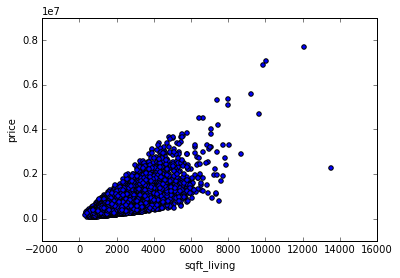

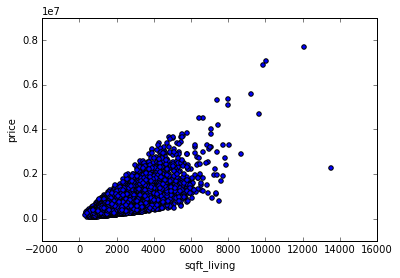

In [6]:
%matplotlib inline
pandas.tools.plotting.scatter_plot(sales, x="sqft_living", y="price")

# Create a train, test split

In [7]:
from sklearn.cross_validation import train_test_split

In [8]:
train_data, test_data = train_test_split(sales, train_size=0.8)

In [9]:
len(train_data), len(test_data)

(17290, 4323)

## Build the regression model using only sqft_living as a feature

In [10]:
from sklearn import linear_model

In [11]:
sqft_model = linear_model.LinearRegression()

In [13]:
sqft_model.fit(X=train_data[['sqft_living']], y=train_data[['price']] )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Evaluate the simple model

In [18]:
predicted = sqft_model.predict(test_data[['sqft_living']])

y_true = test_data[['price']]

In [15]:
from sklearn import metrics

In [16]:
metrics.mean_squared_error(y_true=y_true, y_pred=predicted)

69256463606.361298

# Plotting predicted values using matplotlib

In [19]:
import matplotlib.pyplot as plt

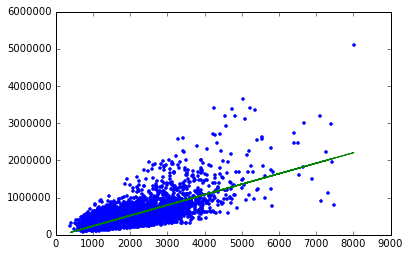

In [20]:
plt.plot(test_data['sqft_living'],test_data['price'],'.',
        test_data['sqft_living'],predicted,'-')

# Build regression model with multiple features

In [21]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [22]:
my_features_model = linear_model.LinearRegression()

In [23]:
x = train_data[my_features]

y = train_data[['price']]

In [24]:
my_features_model.fit(X=x, y=y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
test_x = test_data[my_features]

predicted = my_features_model.predict(test_x)

y_true = test_data[['price']]

In [26]:
metrics.mean_squared_error(y_true=y_true, y_pred=predicted)

66853718693.557686